## Lending Club Loan Data Analysis

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

<b>Dataset columns and definition:</b><br>

<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
<li>pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

<br><br>
<b>Steps to perform:</b><br>


Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
#IMPORT REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
#from pandas_profiling import ProfileReport

In [2]:
#LOAD DATASET 
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## EDA 

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<h5><i>Looks like there are no missing values in the dataset. Checking on column wise data</i></h5>

In [5]:
loan_data["credit.policy"].value_counts(normalize = True)*100

1    80.496972
0    19.503028
Name: credit.policy, dtype: float64

<h5><i>80% of the applicants meet the criteria of credit underwriting by LendingClub.com and 20% of the collected data does not comply with the criteria.
For loan underwriting, the False Negatives are more critical than the false positives. Meaning to say, it is ok for the club to evaluate a potential customer as "Risky" than evaulating a true risky customer as "Safe".<br><br>

Studying the 20% of the Risky cases may give further insights on the "Risky"citeria</i></h5>

In [6]:
loan_data[loan_data["credit.policy"]==1]["not.fully.paid"].value_counts(normalize = True)*100

0    86.848249
1    13.151751
Name: not.fully.paid, dtype: float64

<h5><i>86% of approved loans are not fully paid, only 13% is fully paid. So going by paid not paid may result discrpency in loan approval as majority of them is in not paid </i></h5>

In [7]:
#%Purpose in the Rejeted case
loan_data[loan_data["credit.policy"]==0]["purpose"].value_counts(normalize = True)*100

debt_consolidation    39.293362
all_other             26.552463
credit_card           12.955032
small_business         6.638116
home_improvement       6.263383
educational            4.764454
major_purchase         3.533191
Name: purpose, dtype: float64

<h5><i>Around 40% of risky loans are for Debt Consolidation purposes. Risk for Credit cards are at #3 with 13% of cases.
It would be interesting to see whether loan for debt consolidation are mostly risky.</i></h5>

In [8]:
loan_data[loan_data["purpose"]=="debt_consolidation"]["credit.policy"].value_counts(normalize = True)*100

1    81.450594
0    18.549406
Name: credit.policy, dtype: float64

<h5><i>Just 18.5% of the debt consolidation loan applications are considered risky and still  81.5% cases are healthy loans.</i></h5>

### Extending this analysis to other purposes to analyse the # of risky/safe loan.

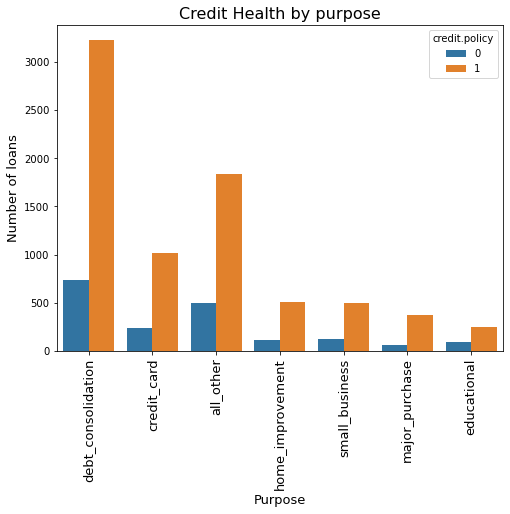

In [9]:
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(1,1,1)

sns.countplot(x = "purpose", hue = "credit.policy", data = loan_data)
plt.xticks(rotation = 90, fontsize = 13)
plt.title("Credit Health by purpose", fontsize = 16)
plt.xlabel("Purpose", fontsize = 13)
plt.ylabel("Number of loans", fontsize = 13)

plt.show()

In [10]:
# Calculating Risky/Total count of loans by purpose
tot_count_of_loans_by_purpose = loan_data.groupby(["purpose"])["credit.policy"].count().reset_index()
tot_count_of_risky_loans_by_purpose = loan_data[loan_data["credit.policy"]==0].groupby(["purpose"])["credit.policy"].count().reset_index()

risky_to_total_ratio_by_purpose = pd.merge(tot_count_of_risky_loans_by_purpose,tot_count_of_loans_by_purpose, on = 'purpose', suffixes = ('_x', '_y'))
risky_to_total_ratio_by_purpose.columns = ["purpose", "Risky","Total"]
risky_to_total_ratio_by_purpose

,purpose,Risky,Total
0,all_other,496,2331
1,credit_card,242,1262
2,debt_consolidation,734,3957
3,educational,89,343
4,home_improvement,117,629
5,major_purchase,66,437
6,small_business,124,619


In [11]:
risky_to_total_ratio_by_purpose["ratio"] = risky_to_total_ratio_by_purpose["Risky"]/risky_to_total_ratio_by_purpose["Total"]*100
risky_to_total_ratio_by_purpose.sort_values("ratio", ascending = False)

,purpose,Risky,Total,ratio
3,educational,89,343,25.947522
0,all_other,496,2331,21.278421
6,small_business,124,619,20.032310
1,credit_card,242,1262,19.175911
4,home_improvement,117,629,18.600954
2,debt_consolidation,734,3957,18.549406
5,major_purchase,66,437,15.102975


<h5><i>Around 26% of the Education purpose loans are termed "Risky" followed by all other purposes and small_businesses </i></h5>

<h4>Interst Rate</h4>

In [12]:
loan_data.groupby("credit.policy").agg({'int.rate':['min','max','mean']})

int.rate                  
                   min     max      mean
credit.policy                           
0                 0.06  0.2164  0.138680
1                 0.06  0.2121  0.118754

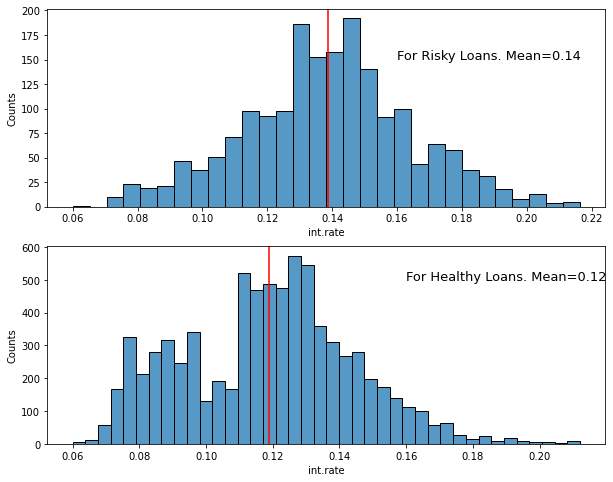

In [13]:
fig = plt.figure(figsize = (10,8))
ax1 = plt.subplot(211)
sns.histplot(loan_data[loan_data["credit.policy"]==0]["int.rate"], kde = False)
plt.axvline(x = loan_data[loan_data["credit.policy"]==0]["int.rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(0.16,150,"For Risky Loans. Mean={}".format(round(loan_data[loan_data["credit.policy"]==0]["int.rate"].mean(),2)), fontsize =13)

ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["credit.policy"]==1]["int.rate"], kde = False)
plt.axvline(x = loan_data[loan_data["credit.policy"]==1]["int.rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(0.16,500,"For Healthy Loans. Mean={}".format(round(loan_data[loan_data["credit.policy"]==1]["int.rate"].mean(),2)), fontsize =13)

plt.show()

<h5><i>The average interest rate for the Risky loans is around 2% higher than the healthy loans.</i></h5>

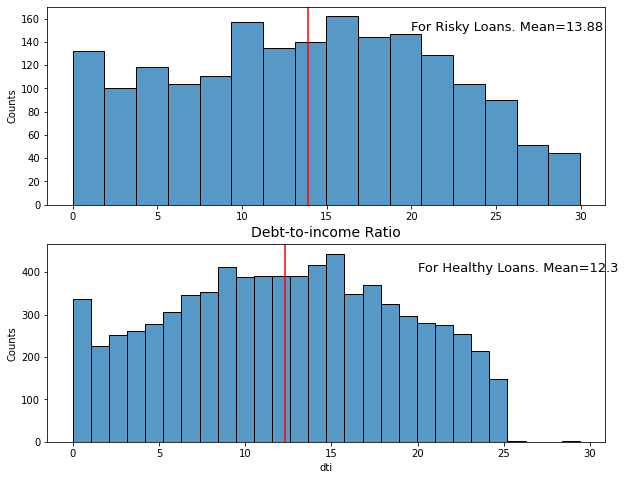

In [14]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[loan_data["credit.policy"]==0]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["credit.policy"]==0]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(20,150,"For Risky Loans. Mean={}".format(round(loan_data[loan_data["credit.policy"]==0]["dti"].mean(),2)), fontsize =13)


ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["credit.policy"]==1]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["credit.policy"]==1]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(20,400,"For Healthy Loans. Mean={}".format(round(loan_data[loan_data["credit.policy"]==1]["dti"].mean(),2)), fontsize =13)

plt.show()

<h5><i>The Debt to Income ratio is higher for the Risky loans. We can also check the DTI ratio for the debt_consolidation loans to assess the risk apetite</i></h5>

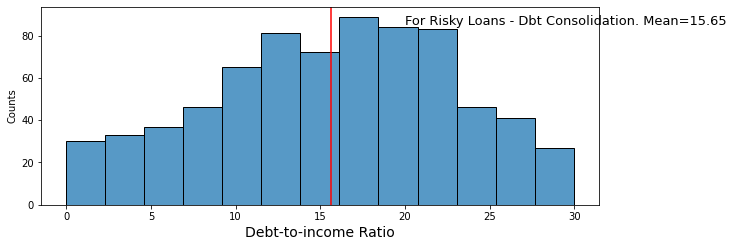

In [15]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[(loan_data["credit.policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"], kde = False)
plt.axvline(x = loan_data[(loan_data["credit.policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(20,85,"For Risky Loans - Dbt Consolidation. Mean={}".format(round(loan_data[(loan_data["credit.policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"].mean(),2)), fontsize =13)
plt.show()

In [16]:
mean_dti_by_purpose_policy= loan_data.groupby(["purpose","credit.policy"])["dti"].mean().reset_index()
mean_dti_by_purpose_policy

,purpose,credit.policy,dti
0,all_other,0,12.036190
1,all_other,1,10.820905
2,credit_card,0,15.350620
3,credit_card,1,13.802539
4,debt_consolidation,0,15.654455
5,debt_consolidation,1,13.717093
6,educational,0,11.243034
7,educational,1,11.380630
8,home_improvement,0,13.008889
9,home_improvement,1,9.555059


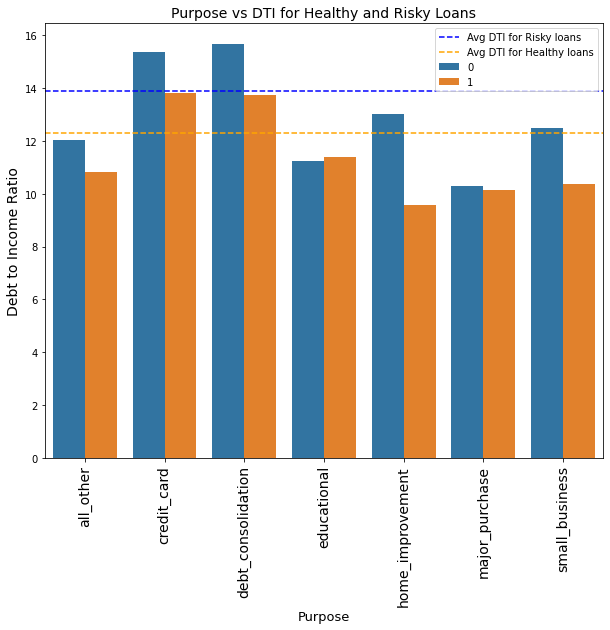

In [17]:
fig = plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)

sns.barplot(data = mean_dti_by_purpose_policy,x ="purpose" , y="dti", hue = "credit.policy")
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel("Debt to Income Ratio", fontsize = 14)
plt.xlabel("Purpose", fontsize = 13)
plt.title("Purpose vs DTI for Healthy and Risky Loans", fontsize = 14)

ax2 = ax2.twinx().twiny()
plt.axhline(y = loan_data[loan_data["credit.policy"]==0]["dti"].mean(), color = 'blue', linestyle = '--', label = "Avg DTI for Risky loans")
plt.axhline(y = loan_data[loan_data["credit.policy"]==1]["dti"].mean(), color = 'orange', linestyle = '--', label = "Avg DTI for Healthy loans")
plt.legend(loc = 1)
plt.show()

<h5><i>Higher the DTI ratio, higher the chances of risk. The average DTI for a healthy loan is ~12.5. However, DTI with values as low as 10.5 can also be risky. Though it does not imply that the credit policy is corelated to the DTI.</i></h5>

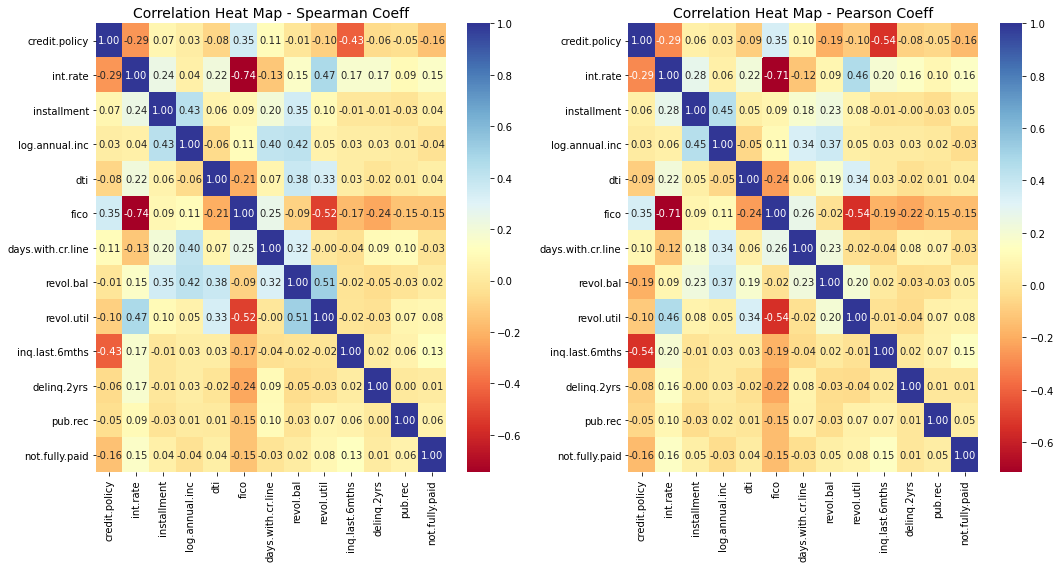

In [18]:
fig = plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
sns.heatmap(loan_data.corr('spearman'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Spearman Coeff", fontsize = 14)

ax2 = plt.subplot(122)
sns.heatmap(loan_data.corr('pearson'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize = 14)
plt.tight_layout()
plt.show()

<h5><i>The DTI is correlated with Revolving Balance and Revolving utilization of the credit amount(using Spearman correlation). However, DTI is only correlated to Revolving Utiliization with Pearson corelation coefficient.
<br><br>
It will be better to determine the correct corelation alogithm to apply but looking the variation of DTI and Revol_Bal and Revol_util in a scatter plot</i></h5>

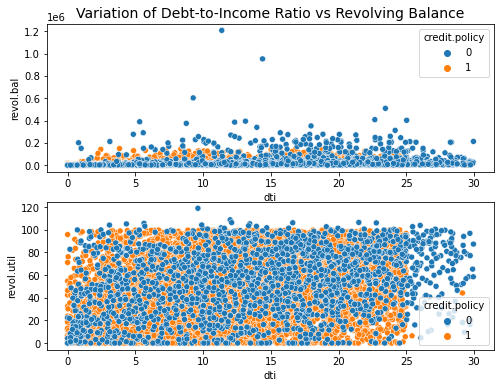

In [19]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)

plt.title("Variation of Debt-to-Income Ratio vs Revolving Balance", fontsize = 14)
sns.scatterplot(data = loan_data[["dti", "revol.bal", "revol.util","credit.policy"]], x = "dti", y = "revol.bal", hue = "credit.policy")

ax1 = plt.subplot(212)
sns.scatterplot(data = loan_data[["dti", "revol.bal", "revol.util","credit.policy"]], x = "dti", y = "revol.util", hue = "credit.policy")


plt.show()

<h5><i>There appears to be no corelation between DTI and Revolving Balance/Utilization. However, from the correlation coeff, it appears that the fico - Credit Scope and the interest rates are negatively correlated.</i></h5>

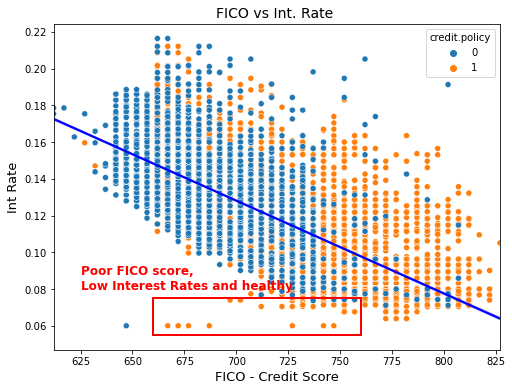

In [20]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[["fico", "int.rate","credit.policy"]], x = "fico", y = "int.rate", color = 'b', hue = "credit.policy")
sns.regplot(data = loan_data[["fico", "int.rate"]], x = "fico", y = "int.rate", color = 'b', scatter = False)
plt.title("FICO vs Int. Rate ", fontsize = 14)
plt.ylabel("Int Rate", fontsize = 13)
plt.xlabel("FICO - Credit Score", fontsize = 13)
rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
ax1.add_patch(rect)
plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

<h5><i>The higher the FICO score, the lower the interest rates. Also, the higher credit score have better risk credibility. However, there are a few cases where lower interest rates were offered even though the FICO score was very poor. One possibility is if there hase been a compromise to adhere to the policy of loan disbursement and favours been granted.
<br><br>
For the sake of analysis, any FICO lower than 735 can be deened as poor credit score.</i></h5>

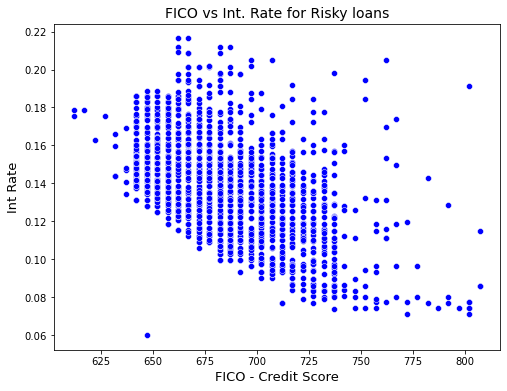

In [21]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[loan_data["credit.policy"]==0], x = "fico", y = "int.rate", color = 'b')
#sns.regplot(data = loan_data[loan_data["credit_policy"]==0], x = "fico", y = "int_rate", color = 'b', scatter = False)
plt.title("FICO vs Int. Rate for Risky loans", fontsize = 14)
plt.ylabel("Int Rate", fontsize = 13)
plt.xlabel("FICO - Credit Score", fontsize = 13)
#rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
#ax1.add_patch(rect)
#plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

### Identifying the loans that are termed "Healthy" in spite of having a low Credit Score and very low interest rates. Listing all the loans with FICO < 725 but interest rates between 5% to 8%

In [22]:
low_Fico_Int_Rates = loan_data[(loan_data["credit.policy"]==1) & ((0.05<=loan_data["int.rate"]) & (0.08>=loan_data["int.rate"]))& (loan_data["fico"]<725)]
low_Fico_Int_Rates.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
453,1,debt_consolidation,0.0600,467.45,11.042922,15.28,687,4652.041667,26044,34.5,3,0,0,0
1031,1,credit_card,0.0600,231.03,11.184421,14.07,672,2910.000000,15885,46.9,1,1,0,0
1400,1,debt_consolidation,0.0600,216.38,10.239960,12.09,667,2550.000000,14320,67.5,1,0,0,0
2582,1,debt_consolidation,0.0800,441.84,11.050890,10.82,717,3210.000000,10513,32.0,1,0,0,0
2707,1,all_other,0.0768,374.29,11.156193,12.62,722,2911.000000,16810,32.3,2,0,0,1


### Checking the correlation between Credit Policy and the Days with Credit Line

In [23]:
loan_data[["credit.policy", "days.with.cr.line"]].groupby("credit.policy").mean()

,days.with.cr.line
credit.policy,
0,4058.456304
1,4682.468461


### Will convert the days of credit line to years to see if the short term loans are Safer than the Longer term lo

In [24]:
df_cr_line_policy = loan_data.loc[:,("credit.policy", "days.with.cr.line")]
df_cr_line_policy["cr line duration in years"] = np.round(df_cr_line_policy["days.with.cr.line"].apply(lambda x: x/365.25),2)
df_cr_line_policy.head()

,credit.policy,days.with.cr.line,cr line duration in years
0,1,5639.958333,15.44
1,1,2760.000000,7.56
2,1,4710.000000,12.90
3,1,2699.958333,7.39
4,1,4066.000000,11.13


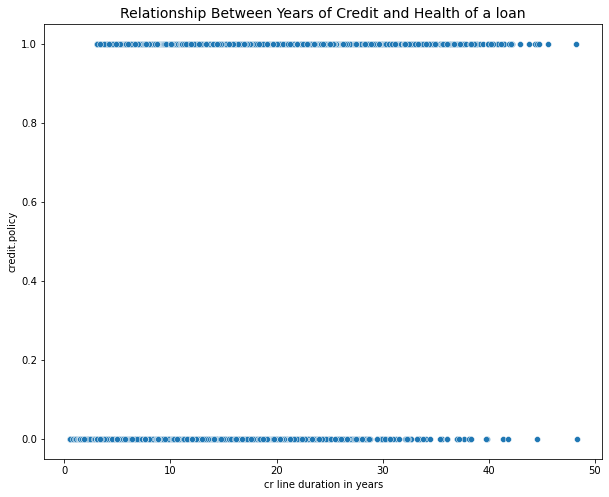

In [25]:
#PLotting a scatter plot with years and the credit policy
fig = plt.figure(figsize = (10,8))
ax1 = plt.subplot(111)
sns.scatterplot(data = df_cr_line_policy, x = "cr line duration in years", y = "credit.policy")
plt.title("Relationship Between Years of Credit and Health of a loan", fontsize = 14)
plt.show()

In [26]:
#Let's group the years in short term, medium term, long term and very long term loans
def duration_type(y):
    if (0<=y) & (y<=3) :
        return "Short Term"
    elif (4<=y) & (y<=10):
        return "Medium Term"
    elif (11<=y) & (y<=20):
        return "Long Term"
    elif y>=21:
        return "Very Long Term"

df_cr_line_policy["Duration.Type"] = df_cr_line_policy["cr line duration in years"].apply(lambda x : duration_type(x))
df_cr_line_policy.sort_values(["cr line duration in years"])

,credit.policy,days.with.cr.line,cr line duration in years,Duration.Type
8156,0,180.041667,0.49,Short Term
8184,0,180.041667,0.49,Short Term
8223,0,180.041667,0.49,Short Term
7759,0,178.958333,0.49,Short Term
8207,0,183.041667,0.50,Short Term
...,...,...,...,...
8531,0,16260.000000,44.52,Very Long Term
6014,1,16350.000000,44.76,Very Long Term
5801,1,16652.000000,45.59,Very Long Term
7553,1,17616.000000,48.23,Very Long Term


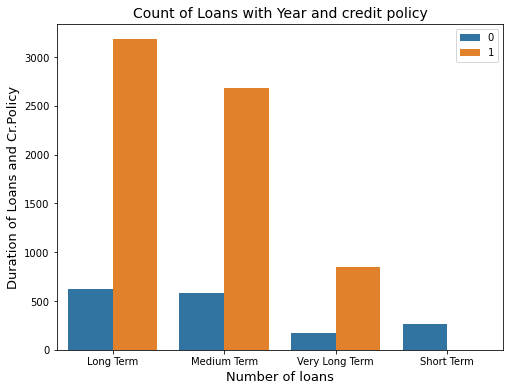

In [27]:
plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.countplot(data =df_cr_line_policy, x = "Duration.Type", hue = "credit.policy" )

plt.title("Count of Loans with Year and credit policy", fontsize = 14)
plt.xlabel("Number of loans", fontsize = 13)
plt.ylabel("Duration of Loans and Cr.Policy", fontsize = 13)
plt.legend(loc  = 1)
plt.show()

<h5><i>From the above chart, it is very evident that the long duration loans are less riskier than the short termed loans. However, very long terms loans are also little riskier compared to medium and long term loans.</i></h5>

### The credit policy is a little negatively correlated with the inquiries made in the last 6 months. Let's us verify this with a scatter plot

In [28]:
loan_data["credit.policy"].map({0:"Risky", 1:"Healthy"}).head()

0    Healthy
1    Healthy
2    Healthy
3    Healthy
4    Healthy
Name: credit.policy, dtype: object

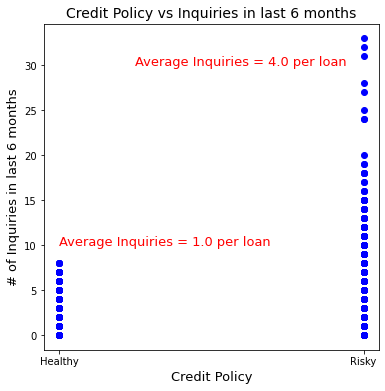

In [29]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.scatter( x=loan_data["credit.policy"].map({0:"Risky", 1:"Healthy"}), y = loan_data["inq.last.6mths"], color = "b")
plt.title("Credit Policy vs Inquiries in last 6 months", fontsize = 14)
plt.xlabel("Credit Policy", fontsize = 13)
plt.ylabel("# of Inquiries in last 6 months", fontsize = 13)
plt.text(0,10,"Average Inquiries = {} per loan".format(np.round(loan_data[loan_data["credit.policy"]==1]["inq.last.6mths"].mean(),0)), fontsize = 13, color = "r")
plt.text(0.25,30,"Average Inquiries = {} per loan".format(np.round(loan_data[loan_data["credit.policy"]==0]["inq.last.6mths"].mean(),0)), fontsize = 13, color = "r")
plt.show()

<h5><i>It is very evident that if the number of inquiries are more, than the loan will be classifed as Risky. For healthy loans, very few inquiries(less than 1 per loan) are made. Whereas, for risky loans, the average inquires are around 4 per loan.
<br><br>
This happens when the customer applies for a loan in multiple banks to get a quote of interst rates for comaprision and usually this approach works against the loan application.</i></h5>

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
list_col = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'] # Added constant column to caluclate the VIF properly
X = loan_data[list_col]
X["constant"] = 1
vif_df["Features"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_df.sort_values("VIF", ascending = False)

,Features,VIF
13,constant,1951.159813
5,fico,3.324696
1,int.rate,2.743588
8,revol.util,1.725836
0,credit.policy,1.665585
2,installment,1.607658
3,log.annual.inc,1.536713
9,inq.last.6mths,1.466932
7,revol.bal,1.366761
6,days.with.cr.line,1.305249


<b>
<li>Around 40% of risky loans are for Debt Consolidation purposes. Risk for Credit cards are at #3 with 13% of cases. It would be interesting to see whether loan for debt consolidation are mostly risky.
<li>Around 1/4th of the Education purpose loans are termed "Risky".
<li>The average interest rate for the Risky loans is around 2% higher than the healthy loans.
<li>Higher the DTI ratio, higher the chances of risk. The average DTI for a healthy loan is ~12.5. However, DTI with values as low as 10.5 can also be risky.
<li>The higher the FICO score, the lower the interest rates. Also, the higher credit score have better risk credibility. However, there are a few cases where lower interest rates were offered even though the FICO score was very poor. One possibility is if there hase been a compromise to adhere to the policy of loan disbursement and favours been granted.
<li>Long duration loans(11 to 20 yrs) are less riskier than the short termed loans(0 to 3 years). However, very long terms loans(>20 years) are also little riskier compared to medium(4 to 10 years) and long term loans.
<li>The number of inquiries are more, than the loan will be classifed as Risky. FOr healthy loans, very few inquiries(<1 per loan) are made. Whereas, for risky loans, the average inquires are around 4 per loan.
<li>The dataset was also tested for multicolinearity and found no features highly corelated with other features
</b>

## ANN Algorithm

In [31]:
#Evaluation of Model - Confusion Matrix Plot
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [32]:
from keras.callbacks import Callback

class TerminateOnBaseline(Callback):
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True
                
callbacks = [TerminateOnBaseline(monitor='accuracy', baseline=0.99)]
callbacks_val = [TerminateOnBaseline(monitor='val_accuracy', baseline=0.97)]

In [33]:
#ONE HOT ENCODING
purpose = pd.get_dummies(loan_data.purpose, drop_first=True)
purpose

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [34]:
# CONCATINATE DATA TO THE MAIN DATAFRAME
loan_data = pd.concat([loan_data,purpose],axis=1)
loan_data.shape

(9578, 20)

In [35]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [36]:
#DROP THE COLUMN PURPOSE AS WE HAVE GOT THE VALUES THROUGH OHC
data = loan_data
data.drop('purpose',axis=1,inplace=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [37]:
# SPLIT THE DATA TO FEATURES AND TARGET 
X = data.drop('credit.policy',axis=1)
y = data['credit.policy']

In [38]:
# SPLIT THE DATA TO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [44]:
# DEFINE MODEL
model = tf.keras.models.Sequential(
    [
        #Input Layer
        keras.layers.Reshape((18,),input_shape=(18,)),
        keras.layers.BatchNormalization(),
        #keras.layers.Dropout(0.1),
        
        #First Layer
        keras.layers.Dense(192, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        
        #Second Layer
        keras.layers.Dense(192, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        
        #Third Layer
        keras.layers.Dense(192, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        
        #Fourth Layer
        #keras.layers.Dense(128, activation="relu"),
        #keras.layers.BatchNormalization(),
        #keras.layers.Dropout(0.2),  
        
        #Output Layer
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()
sgd_optimizer = tf.keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 18)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 18)                72        
_________________________________________________________________
dense_4 (Dense)              (None, 192)               3648      
_________________________________________________________________
batch_normalization_5 (Batch (None, 192)               768       
_________________________________________________________________
dropout_3 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_6 (Batch (None, 192)              

Epoch 1/200
34/34 [==============================] - 0s 14ms/step - loss: 0.5847 - accuracy: 0.7281 - val_loss: 1.0384 - val_accuracy: 0.1895
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 0.3983 - accuracy: 0.8453 - val_loss: 0.4960 - val_accuracy: 0.8575
Epoch 3/200
34/34 [==============================] - 0s 10ms/step - loss: 0.3397 - accuracy: 0.8771 - val_loss: 0.4251 - val_accuracy: 0.8309
Epoch 4/200
34/34 [==============================] - 0s 8ms/step - loss: 0.3025 - accuracy: 0.8897 - val_loss: 0.4399 - val_accuracy: 0.8356
Epoch 5/200
34/34 [==============================] - 0s 8ms/step - loss: 0.2808 - accuracy: 0.9003 - val_loss: 0.4568 - val_accuracy: 0.8361
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 0.2702 - accuracy: 0.8974 - val_loss: 0.4365 - val_accuracy: 0.8413
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 0.2548 - accuracy: 0.9062 - val_loss: 0.4077 - val_accuracy: 0.8533
Epoch 8/200

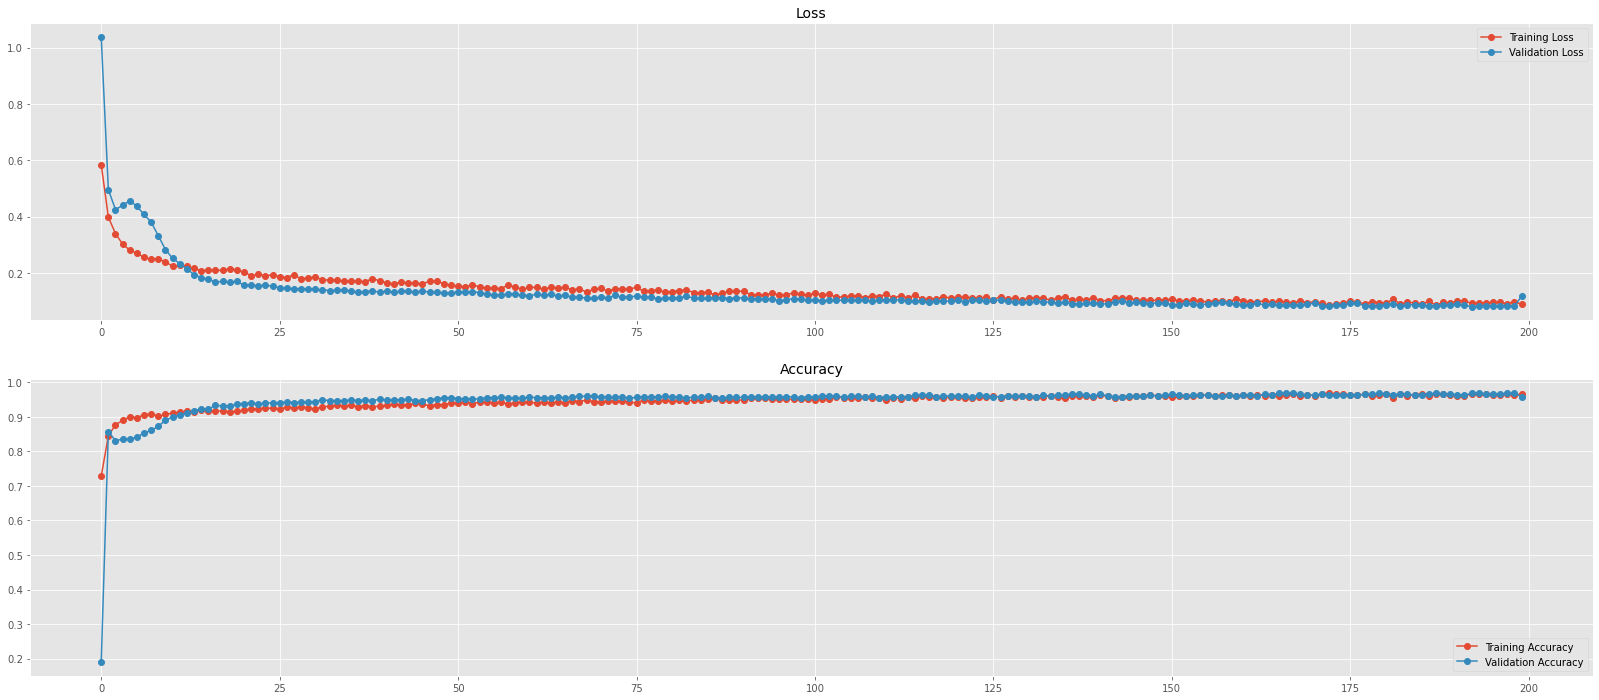

In [45]:
model_result=model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=232,callbacks=[[callbacks,callbacks_val]], verbose=1)

from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(28,12))

ax1 = plt.subplot(211)
plt.title("Loss", fontsize = 14)
plt.plot(model_result.history['loss'],marker='o',label='Training Loss')
plt.plot(model_result.history['val_loss'],marker='o',label='Validation Loss')
plt.legend()

ax1 = plt.subplot(212)
plt.title("Accuracy", fontsize = 14)
plt.plot(model_result.history['accuracy'],marker='o',label='Training Accuracy')
plt.plot(model_result.history['val_accuracy'],marker='o',label='Validation Accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       363
           1       0.96      0.99      0.97      1553

    accuracy                           0.96      1916
   macro avg       0.96      0.90      0.93      1916
weighted avg       0.96      0.96      0.96      1916



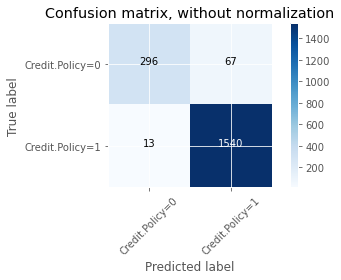

In [46]:
predictions = model.predict_classes(X_test)
plot_confusion_matrix(confusion_matrix(y_test,predictions), classes=['Credit.Policy=0','Credit.Policy=1'],title='Confusion matrix, without normalization')
print("\n\nClassification Report\n",classification_report(y_test,predictions))

## Additional Algorithm - Training using Decision Tree

Confusion matrix, without normalization


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       1.00      0.99      1.00      1553

    accuracy                           0.99      1916
   macro avg       0.98      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



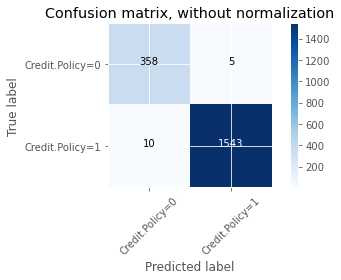

In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,predictions), classes=['Credit.Policy=0','Credit.Policy=1'],title='Confusion matrix, without normalization')
print("\n\nClassification Report\n",classification_report(y_test,predictions))

## Additional Algorithm - Training using Random Forest

Confusion matrix, without normalization


Classification Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       363
           1       0.99      1.00      1.00      1553

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



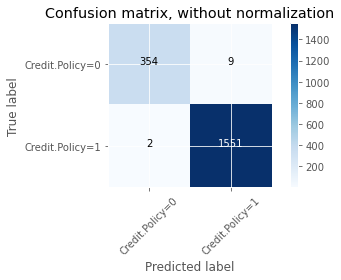

In [43]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,predictions), classes=['Credit.Policy=0','Credit.Policy=1'],title='Confusion matrix, without normalization')
print("\n\nClassification Report\n",classification_report(y_test,predictions))